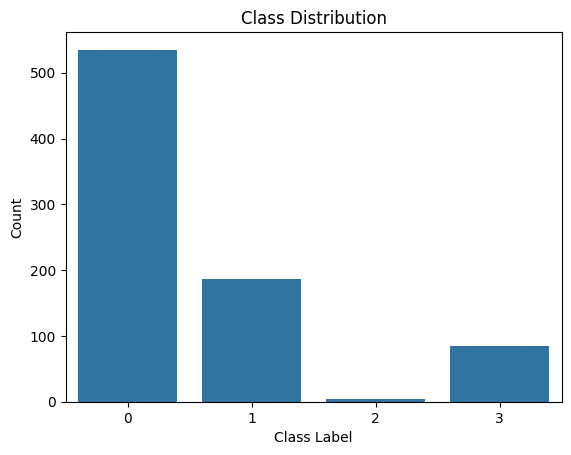

label
0    535
1    186
3     84
2      4
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("consumer_complaints_sample.csv")

# Focus only on text complaints that are not null
df = df[['Product', 'Consumer complaint narrative']].dropna()

# Filter for only selected categories
target_products = [
    'Credit reporting, credit repair services, or other personal consumer reports',
    'Debt collection', 'Consumer Loan', 'Mortgage'
]
df = df[df['Product'].isin(target_products)]

# Map to numeric labels
label_map = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}
df['label'] = df['Product'].map(label_map)

# Plot class distribution
sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

print(df['label'].value_counts())


In [2]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # keep only alphabets
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['Consumer complaint narrative'].apply(preprocess)

# Show sample cleaned text
df[['Consumer complaint narrative', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Consumer complaint narrative,cleaned_text
3,In accordance with the Fair Credit Reporting a...,accordance fair credit reporting act list acco...
5,Although I have never been late on a payment w...,although never late payment xxxx since become ...
11,I went to check my credit report on XX/XX/2017...,went check credit report xxxx found couple ite...
16,"Community Loan Servicing, LLC. \nXXXX XXXX XXX...",community loan servicing llc xxxx xxxx xxxx xx...
25,The debt is with rise credit which I paid and ...,debt rise credit paid try dispute equifax send...


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.7840
Naive Bayes Accuracy: 0.6358
Linear SVM Accuracy: 0.8210


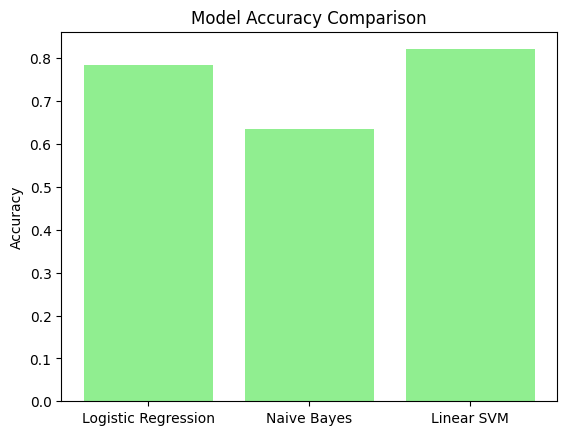

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Visual comparison
plt.bar(results.keys(), results.values(), color='lightgreen')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       102
           1       0.83      0.60      0.70        48
           2       0.00      0.00      0.00         3
           3       0.80      0.89      0.84         9

    accuracy                           0.82       162
   macro avg       0.61      0.61      0.60       162
weighted avg       0.81      0.82      0.81       162



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


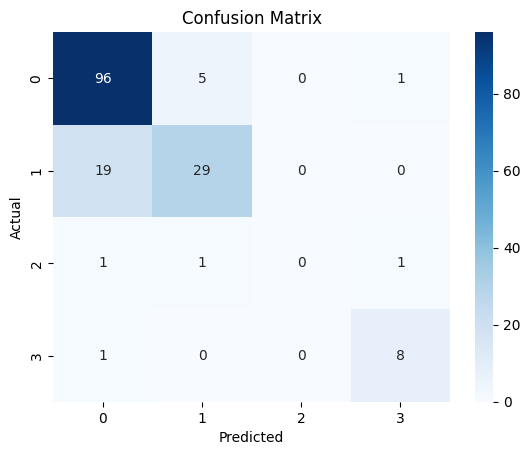

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the best model - Let's say LinearSVM
best_model = models["Linear SVM"]
predictions = best_model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, predictions))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
# Sample complaint
sample = ["There is a hard inquiry I didn’t authorize."]
sample_clean = [preprocess(text) for text in sample]
sample_vec = tfidf.transform(sample_clean)

# Predict
predicted_label = best_model.predict(sample_vec)[0]
category_map = {0: "Credit reporting", 1: "Debt collection", 2: "Consumer Loan", 3: "Mortgage"}
print(f"Predicted Category: {category_map[predicted_label]}")


Predicted Category: Credit reporting
